Placement predictor
A project by AB THEJESHWAR + CR SHARVESH KUMAR + TAMIL VENDHAN K + VAJAKATHALI A
Enter CGPA:7.47
Enter 10th score(out of 100):64
Are you a dip grad(Y/N):N
Enter 12th score(out of 100):83
Enter AMCAT score(out of 100):70
0.03 0.03 0.03

The required three points are:
224.5 , 2
224.5 , 2
224.5 , 2
YES



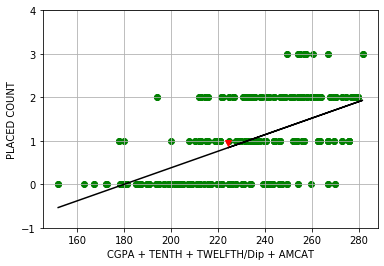

EFFICIENCY: 47.8
GIVEN INPUT: 224.47 PREDICTED VALUE: 0.9440528886347795


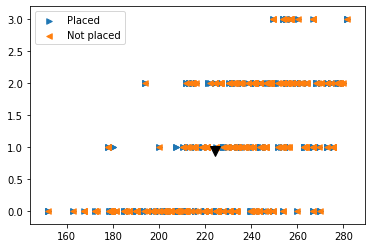

In [1]:
print("Placement predictor")
print("A project by AB THEJESHWAR + CR SHARVESH KUMAR + TAMIL VENDHAN K + VAJAKATHALI A")

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt
from math import floor

d=[]
a1,b1,a2,b2=[],[],[],[]

def estimate_coef(x, y): 
  # number of observations/points 
  n = np.size(x) 

  # mean of x and y vector 
  m_x, m_y = np.mean(x), np.mean(y) 

  # calculating cross-deviation and deviation about x 
  SS_xy = np.sum(y*x) - n*m_y*m_x 
  SS_xx = np.sum(x*x) - n*m_x*m_x 

  # calculating regression coefficients 
  b_1 = SS_xy / SS_xx 
  b_0 = m_y - b_1*m_x 

  return(b_0, b_1) 

#euclidean distance formula
def eform(x1, y1, x2, y2):

    r = float(sqrt(((x1-x2)**2)+(y1-y1)**2))
    r = round(r,4)
    d.append(r)


#linear regression

def plot_regression_line(x, y, b, x1, y1): 

    plt.scatter(x, y, color = "g", marker = "o", s = 30)

    plt.ylim(-1,4)

    # plt.plot(a1, b1, color = "g", marker = "<")

    # plt.plot(a2, b2, color = "m", marker = ">")

    # predicted response vector 

    y_pred = b[0] + b[1]*x 

    #y1 =  b[1]*x1

    # plotting the regression line 

    plt.plot(x, y_pred, color = "k") 

    # plt.xlim(5,10)

    # putting labels 

    plt.xlabel('CGPA + TENTH + TWELFTH/Dip + AMCAT') 

    plt.ylabel('PLACED COUNT') 

    plt.plot(x1, y1, color = "r", marker = "v")

    plt.grid(True)

    # function to show plot 

    plt.show()

def ex_graph(x, y, z, b, x1, y1):
      xp=[]
      yp=[]
      xq=[]
      yq=[]
      for i in range(len(x)):
        if z[i]=='NO':
          xp.append(x[i])
          yp.append(y[i])
        elif z[i]=='YES':
          xq.append(x[i])
          yq.append(y[i])

      fig = plt.figure()

      ax = fig.add_subplot(111)    
      ax.scatter(xq, yq, s=30, marker='>', label='Placed')
      ax.scatter(xp, yp, s=30, marker='<', label='Not placed')
      plt.plot(x1, y1, color = "k", marker = "v", markersize= 10)
      plt.legend()
      plt.show()

#main code starts here

df=pd.read_csv("https://raw.githubusercontent.com/Sharveshkumar-14/sharvesh-kumar/master/PP%20-%20Sheet1-1.csv")
# print(df)
df=df[:1000]

# x = df["CGPA"].values 
y = df["PCOUNT"].values

xa=[]
xa=df["CGPA"].values+df["TWELTH"].values+df["TENTH"].values+df["AMCAT"]

x=xa

#b is the required slope value
#this slope value is used in Linear regression
b = estimate_coef(x,y)

#regression line is plotted here using the b
#with that b value a new point is also plotted
#plot_regression_line(x,y,b)

#input variable
while(True):
  cgpa=float(input("Enter CGPA:"))
  tenth=float(input("Enter 10th score(out of 100):"))
  choice=input("Are you a dip grad(Y/N):")
  if choice == 'Y':
    dip=float(input("Enter Dip(out of 100):"))
    twelth=0
  else:
    twelth=float(input("Enter 12th score(out of 100):"))
    dip=0
  amcat=float(input("Enter AMCAT score(out of 100):"))
  if( (amcat>100 or amcat<0) and (cgpa>10 or cgpa<0) and (tenth>100 or tenth<0) and (twelth>100 or twelth<0) and (dip>100 and dip<0) ):
    print("Incorrect details!")
  else:
    break

x1=cgpa+tenth+twelth+dip+amcat
s1,s2=0,0
m=0
for i in x:
    s1=s1+i
for i in y:
    s2=s2+i

m=s2/s1
# print(m)
y1 = m*x1

#knn algorithm
for i in range(len(x)):
    eform(x[i],y[i],x1,y1)

for i in range(len(x)):
    for j in range(len(x)-i-1):
      if x is x1:
        pass
      else:
        if d[j]>d[j+1]:
          t1=d[j]
          d[j]=d[j+1]
          d[j+1]=t1

          t2=x[j]
          x[j]=x[j+1]
          x[j+1]=t2

          t3=y[j]
          y[j]=y[j+1]
          y[j+1]=t3

# print(d)
print(d[0],d[1],d[2])

# print(x[0],x[1],x[2])
# print(y[0],y[1],y[2])

print()

print("The required three points are:")
print(x[0],',',y[0])
print(x[1],',',y[1])
print(x[2],',',y[2])

c=0
for i in range(3):
  if y[i]==0:
    c+=1

if c>=2:
  print("NO")
else:
  print("YES")

print()
#c is the count used to calculate number of companies not placed
# print(type(y[0]))
plot_regression_line(x ,y, b, x1, y1)

c=0
total=0
for i in range(len(x)):
    ta=m*x[i]   
    ta = floor(ta)
    ti = floor(y[i])
    if ti == ta:
        c+=1
    total+=1

print("EFFICIENCY:",(c/total)*100)

print("GIVEN INPUT:",x1,"PREDICTED VALUE:",y1)

z=df["PLACED"]
ex_graph( x, y, z, b, x1, y1)